In [36]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [135]:
# Parameters
pi2 = 2*np.pi
Qx = 0.31
Qs = -0.002
CX = np.cos(Qx*pi2)   ; SX = np.sin(Qx*pi2)
CS = np.cos(Qs*pi2)   ; SS = np.sin(Qs*pi2)
Qp = 10


sigd = 1e-4
sigz = sigd
sigx = 1
sigp = sigx

N = int(1e4)
steps = 10
turns = int(1/np.abs(Qs) ) +1
print(turns)

501


In [136]:

def rotation_fix(a,b,CQ,SQ):
    temp = np.copy(a)
    a =     a*CQ + SQ*b 
    b = -temp*SQ + b*CQ 
    return a,b

def rotation(a,b,Q):
    CQ = np.cos(Q*pi2)   ; SQ = np.sin(Q*pi2)

    temp = np.copy(a)
    a =     a*CQ + SQ*b
    b = -temp*SQ + b*CQ 
    return a,b



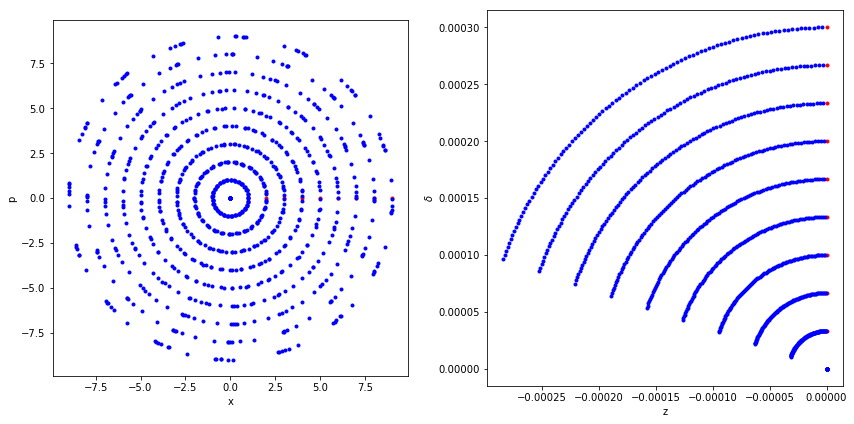

In [149]:
x0 = np.arange(10)
p0 = x0*0
d0 = np.linspace(0,3*sigd,10)
z0 = d0*0

fig = plt.figure(0,figsize=(12,6))
ax0 = fig.add_subplot(121,aspect='equal')
ax1 = fig.add_subplot(122,aspect='equal')
for turn in range(100):
    if turn>0:
        z0,d0 = rotation_fix(z0,d0,CS,SS)
        x0,p0 = rotation(x0,p0,Qx + Qp*d0)
    ax0.plot(x0,p0,'.',c=['r','b'][turn>0])
    ax1.plot(z0,d0,'.',c=['r','b'][turn>0])
    
ax0.set_xlabel('x')
ax0.set_ylabel('p')
ax1.set_xlabel('z')
ax1.set_ylabel(r'$\delta$')
fig.tight_layout()

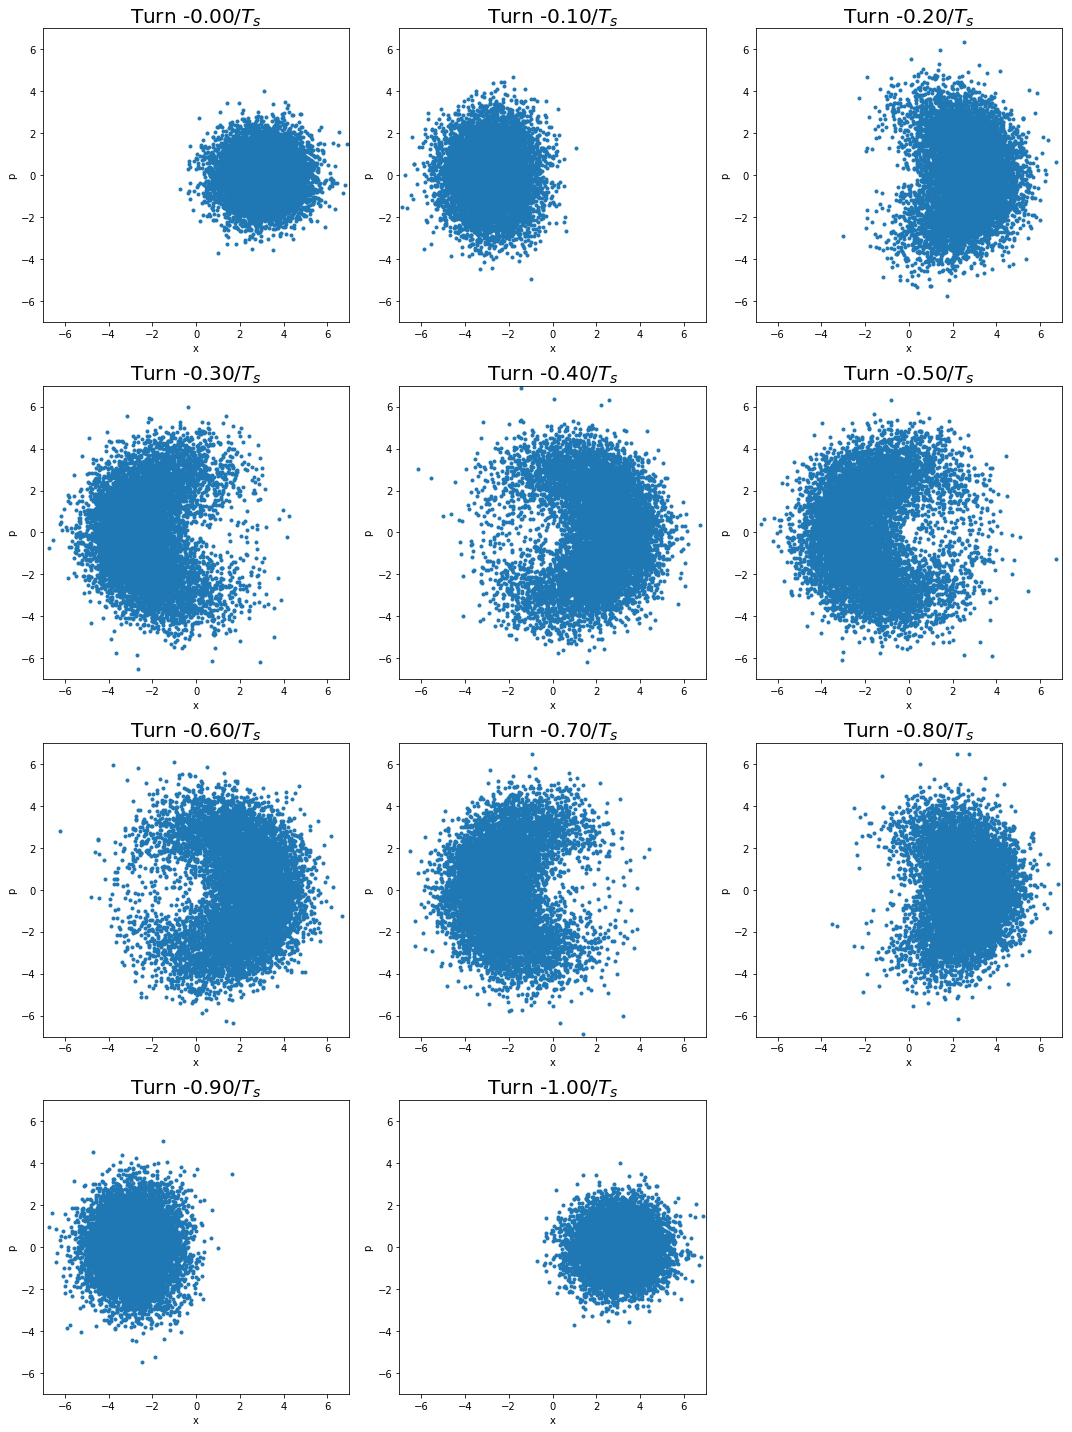

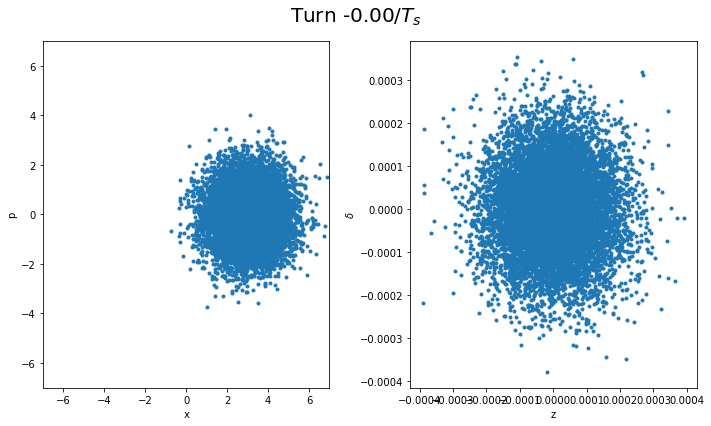

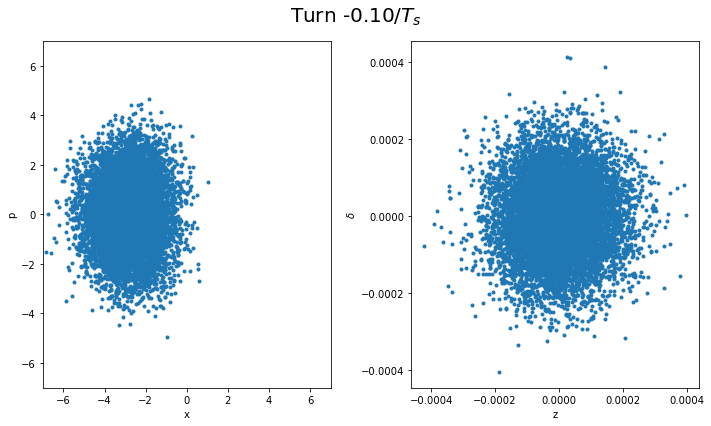

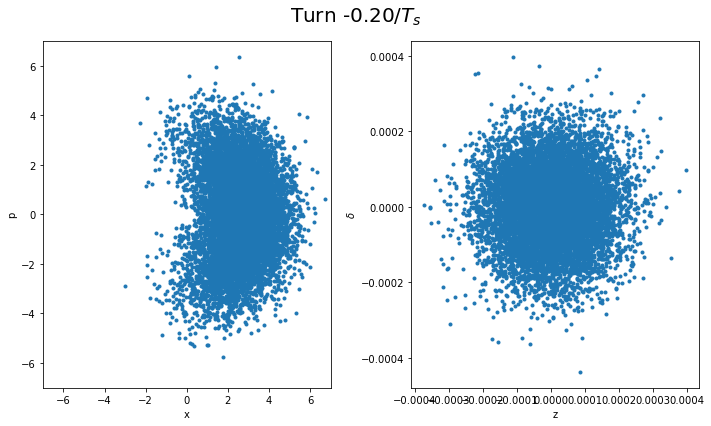

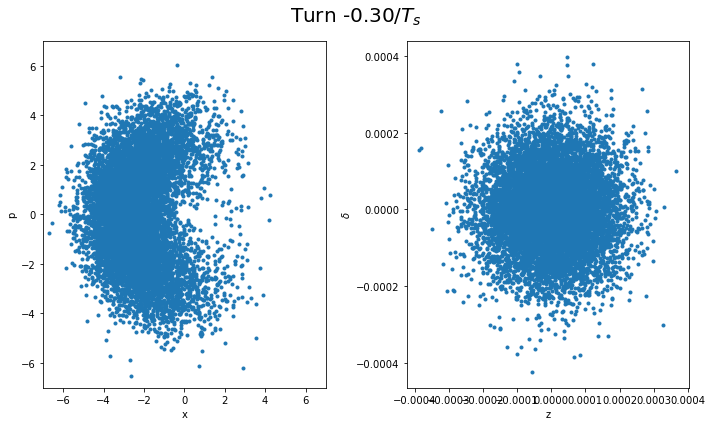

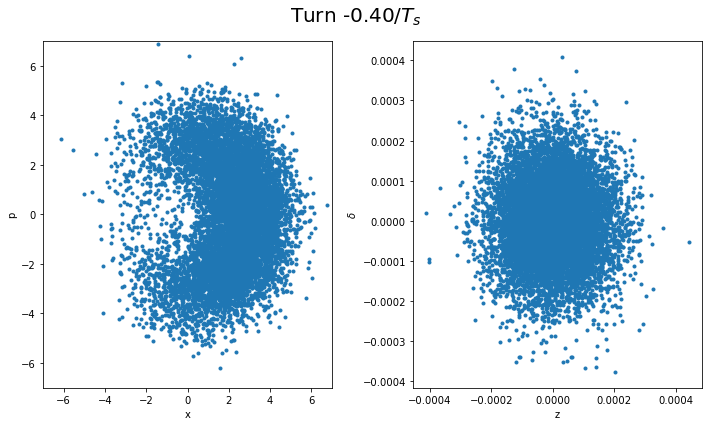

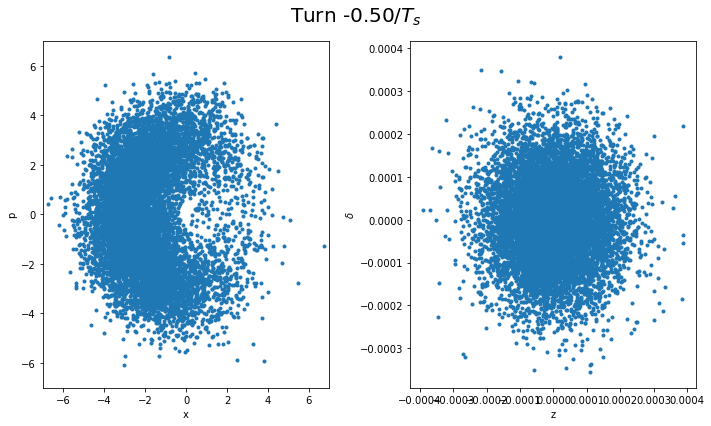

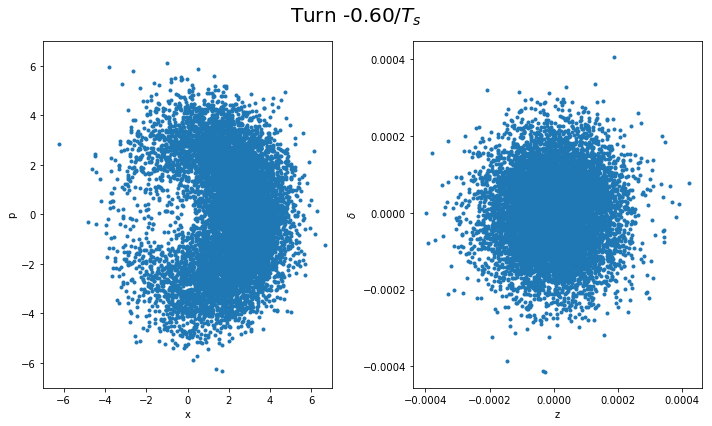

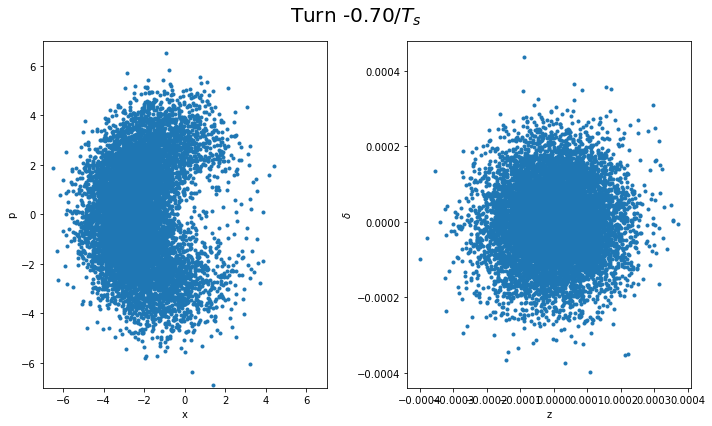

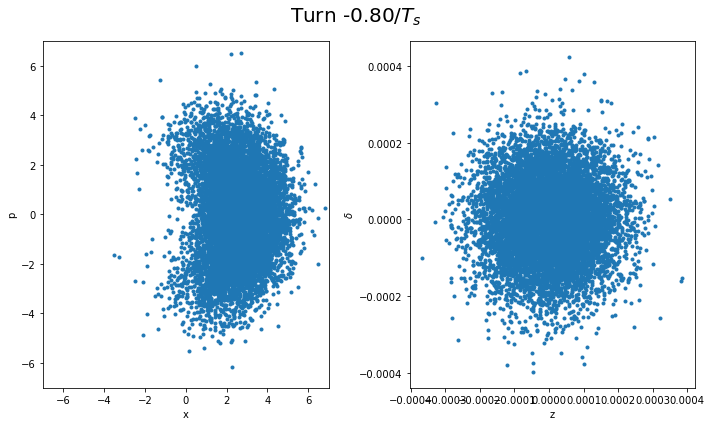

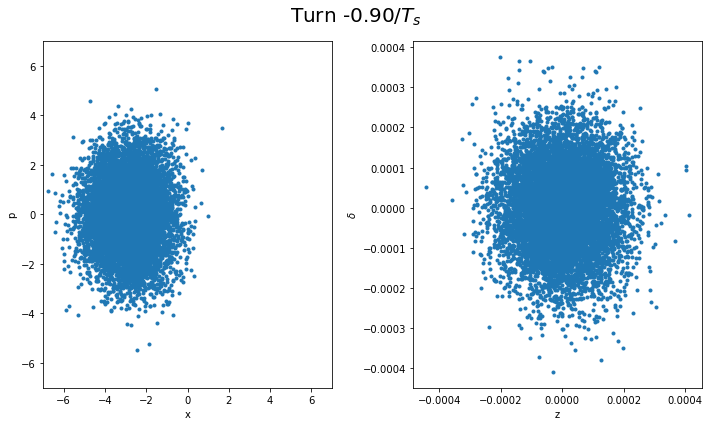

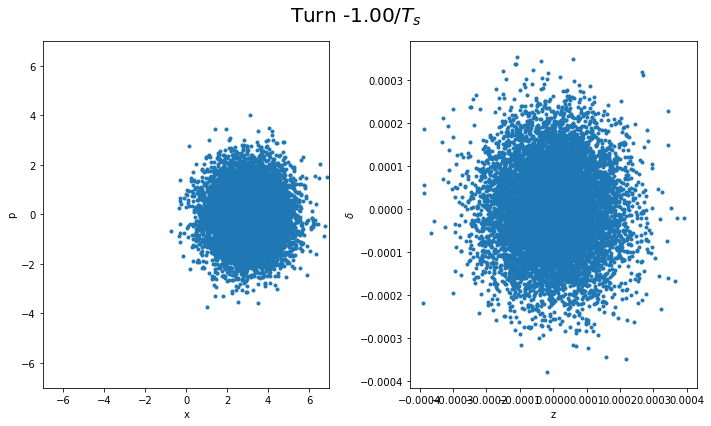

In [150]:
# Initialisation
x = np.random.randn(N) * sigx
p = np.random.randn(N) * sigp
z = np.random.randn(N) * sigz
d = np.random.randn(N) * sigd

# Simulation
x += 3*sigx
xmax = 7
axlim = np.array([-1,1])*xmax

# Store data
datalength = int(turns) 
xMom = np.zeros((datalength,2))
pMom = np.zeros((datalength,2))
# xMom[0,:2] = [np.mean(x) , np.mean(x**2)]
# pMom[0,:2] = [np.mean(p) , np.mean(p**2)]

figAll = plt.figure(9,figsize=(15,20))
count=0

for turn in range(0,turns):
    #Tracking from turn 1
    if turn>0:
        z,d = rotation_fix(z,d,CS,SS)
        x,p = rotation(x,p,Qx + Qp*d)
        
    # Store data
    xMom[turn,:2] = [np.mean(x) , np.mean(x**2)]
    pMom[turn,:2] = [np.mean(p) , np.mean(p**2)]

    # Plot some times
    if np.mod(turn,int(turns/steps))==0:
        count += 1
        nh=4
        ax = figAll.add_subplot(nh,int(np.ceil((1+steps)/nh)),count)
        ax.plot(x,p,'.')
        ax.set_title(r'Turn %.2f/$T_s$'%(turn*Qs),fontsize=20)
        ax.set_xlim(axlim) ; ax.set_ylim(axlim)
        ax.set_xlabel('x')
        ax.set_ylabel('p')
        
        
        fig = plt.figure(10+count, figsize=(10,6))
        plt.suptitle(r'Turn %.2f/$T_s$'%(turn*Qs),fontsize=20)
        ax0 = fig.add_subplot(121)
        ax0.plot(x,p,'.')
        ax0.set_xlabel('x')
        ax0.set_ylabel('p')
        ax0.set_xlim(axlim) ; ax0.set_ylim(axlim)
        
        ax1 = fig.add_subplot(122)
        ax1.plot(z,d,'.')
        ax1.set_xlabel('z')
        ax1.set_ylabel(r'$\delta$')
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        
        
        
figAll.tight_layout()

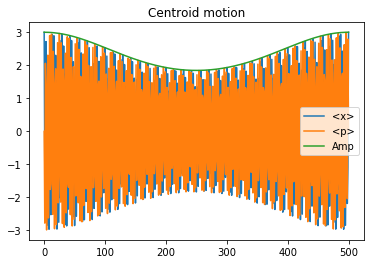

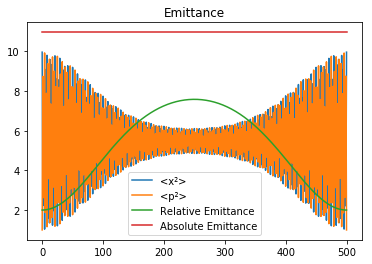

In [131]:
plt.figure()
plt.plot(xMom[:,0],label='<x>')
plt.plot(pMom[:,0],label='<p>')
amp = np.sqrt(xMom[:,0]**2+pMom[:,0]**2)
plt.plot(amp,label='Amp')
plt.title('Centroid motion')
plt.legend(loc=0)

plt.figure()
plt.plot(xMom[:,1],label='<x²>')
plt.plot(pMom[:,1],label='<p²>')
absem = (xMom[:,1]+pMom[:,1])
plt.plot(absem-amp**2,label='Relative Emittance')
plt.plot(absem,label='Absolute Emittance')
plt.title('Emittance')
plt.legend(loc=0)